<a href="https://colab.research.google.com/github/kumarianni/Supplychain_analysis/blob/main/SupplyChainAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (path may change if uploaded manually)
df = pd.read_csv("/content/retail_store_inventory.csv")

# Show first few rows
df.head()


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [ ]:
# Filter rows where Category is 'Clothing'
clothes_df = df[df['Category'] == 'Clothing'].copy()

# Convert 'Date' to datetime format
clothes_df['Date'] = pd.to_datetime(clothes_df['Date'])

# Extract Year-Month from Date
clothes_df['Month'] = clothes_df['Date'].dt.to_period('M')

# Show filtered data
clothes_df.head()


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Month
7,2022-01-01,S001,P0008,Clothing,North,380,312,54,329.73,97.99,5,Cloudy,0,100.09,Spring,2022-01
11,2022-01-01,S001,P0012,Clothing,West,66,24,70,26.75,58.25,20,Snowy,0,62.21,Spring,2022-01
13,2022-01-01,S001,P0014,Clothing,West,193,12,187,6.80,78.11,0,Sunny,0,80.06,Spring,2022-01
14,2022-01-01,S001,P0015,Clothing,North,379,369,154,363.46,92.99,15,Snowy,0,95.80,Winter,2022-01
17,2022-01-01,S001,P0018,Clothing,South,241,151,47,147.27,19.57,5,Cloudy,0,23.13,Autumn,2022-01


In [ ]:
# Group month-wise and sum Demand and Supply
monthly_data = clothes_df.groupby('Month')[['Demand Forecast', 'Units Ordered']].sum().reset_index()

# Rename for clarity
monthly_data.columns = ['Month', 'Total_Demand', 'Total_Supply']

# Calculate the gap
monthly_data['Gap'] = monthly_data['Total_Demand'] - monthly_data['Total_Supply']

# Convert Month to string for plotting
monthly_data['Month'] = monthly_data['Month'].astype(str)

# Display final grouped data
monthly_data


,Month,Total_Demand,Total_Supply,Gap
0,2022-01,80314.45,63231,17083.45
1,2022-02,92738.04,66070,26668.04
2,2022-03,78737.72,65627,13110.72
3,2022-04,83562.94,66181,17381.94
4,2022-05,80742.34,65626,15116.34
5,2022-06,89281.76,66982,22299.76
6,2022-07,93830.51,70599,23231.51
7,2022-08,84091.21,67922,16169.21
8,2022-09,86896.80,67285,19611.80
9,2022-10,82797.20,65598,17199.20


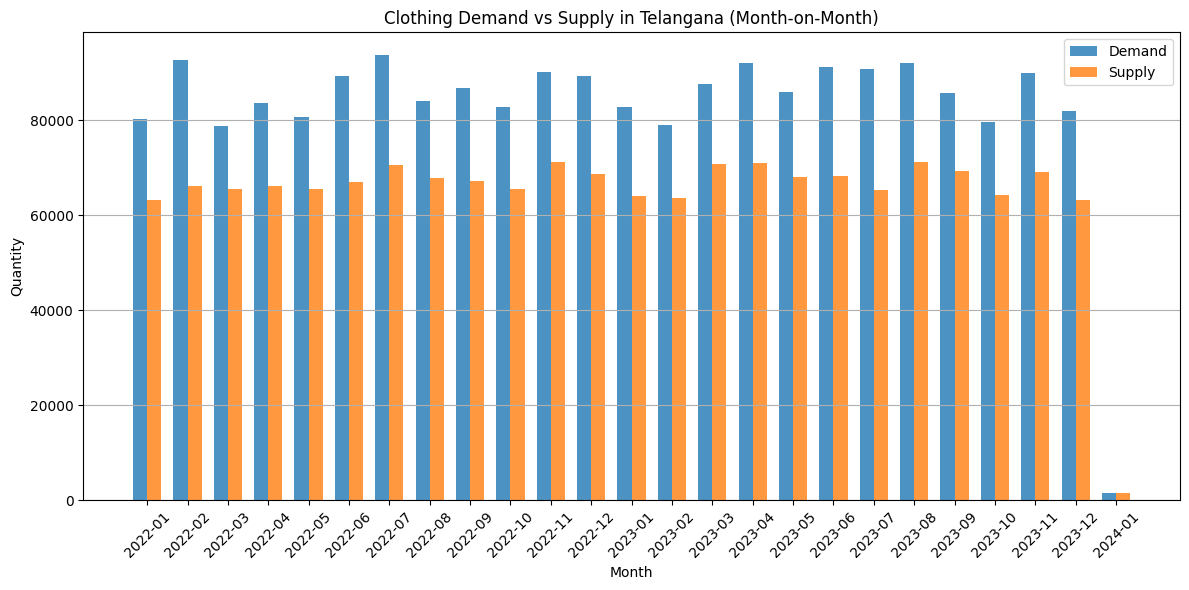

In [ ]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(monthly_data))

# Plot bars
plt.bar(x, monthly_data['Total_Demand'], width=bar_width, label='Demand', alpha=0.8)
plt.bar([i + bar_width for i in x], monthly_data['Total_Supply'], width=bar_width, label='Supply', alpha=0.8)

# Labels
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Clothing Demand vs Supply in Telangana (Month-on-Month)")
plt.xticks([i + bar_width/2 for i in x], monthly_data['Month'], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


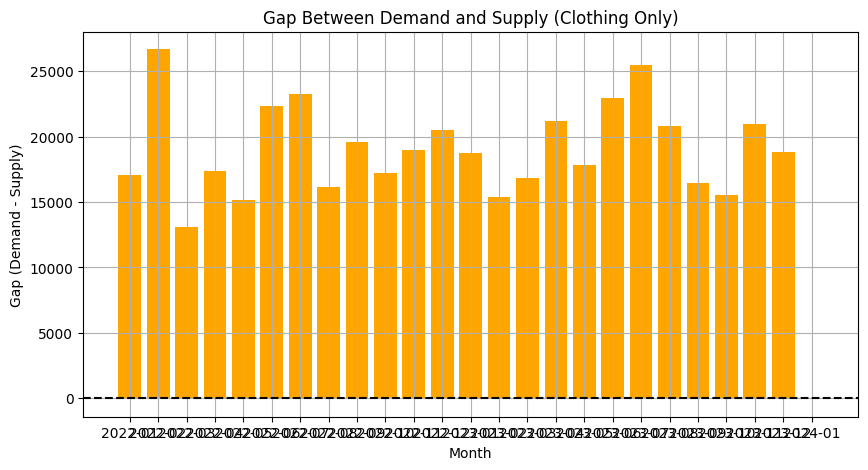

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(monthly_data['Month'], monthly_data['Gap'], color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title("Gap Between Demand and Supply (Clothing Only)")
plt.xlabel("Month")
plt.ylabel("Gap (Demand - Supply)")
plt.grid(True)
plt.show()
